# Importing the necessary libraries

In [1]:
 import numpy as np
 import pandas as pd
 import matplotlib.pyplot as plt
 import seaborn as sns
 from sklearn.preprocessing import StandardScaler
 from sklearn.model_selection import train_test_split
 from sklearn import svm
 from sklearn.metrics import accuracy_score

# Diabetes Data Collection and Analysis

In [3]:
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.shape  #number of rows and columns in the dataset

(768, 9)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Number of zero values in the dataset

In [10]:
 D = []
for i in data.columns:
  D.append(data[data[i]==0].shape[0])

pd.Series(D,index=data.columns)

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [12]:
columns_with_zero = ['Insulin', 'SkinThickness', 'BloodPressure', 'BMI', 'Glucose']
for column in columns_with_zero:    # Calculating the mean of the column (excluding the '0' values)
   
    mean_value = data[data[column] != 0][column].mean()
    
    # Replacing '0' values with the calculated mean
    data[column] = data[column].replace(0, mean_value)

In [15]:
P = []
for i in data.columns:
  P.append(data[data[i]==0].shape[0])
pd.Series(P,index=data.columns)

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [16]:
data.describe() #Statistical measures of the dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [17]:
data['Outcome'].value_counts() #Number of Diabetes and Non-Diabetes in the dataset ( 0 = Non-Diabetes, 1 = Diabetes)

0    500
1    268
Name: Outcome, dtype: int64

#  Data Visualization

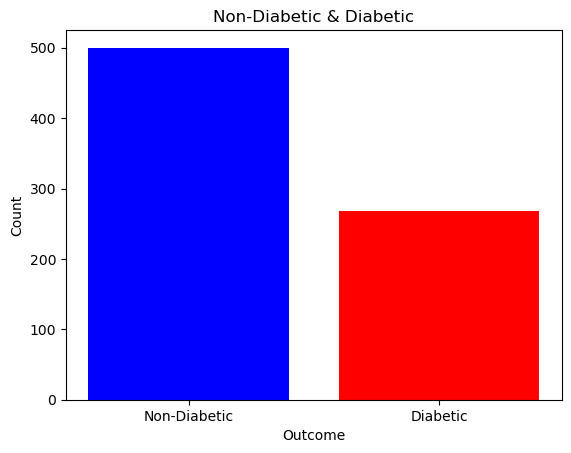

In [18]:
outcome_counts = data['Outcome'].value_counts()
plt.bar(outcome_counts.index, outcome_counts.values, color=['blue', 'red'])
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-Diabetic', 'Diabetic'])
plt.title('Non-Diabetic & Diabetic')
plt.show()

<Axes: ylabel='Outcome'>

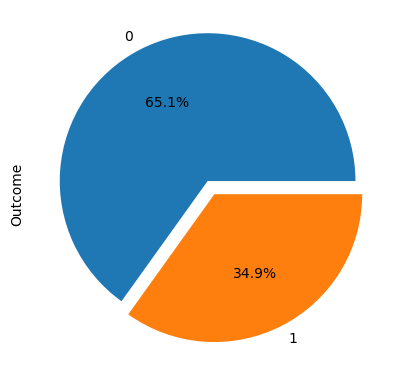

In [19]:
 data['Outcome'].value_counts().plot.pie(autopct='%1.1f%%', explode=[0.1,0])

In [20]:
data.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,110.710121,70.935397,27.768651,142.210761,30.888434,0.429734,31.190000
1,4.865672,142.165573,75.147324,31.736944,180.431548,35.384757,0.550500,37.067164


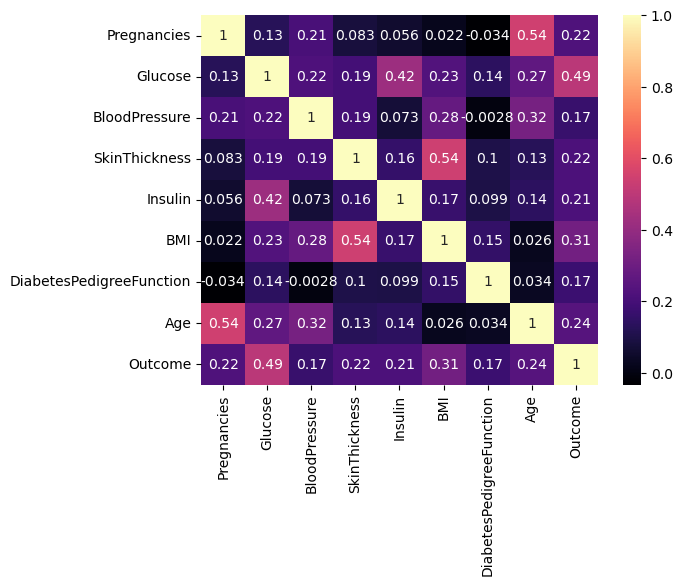

In [21]:
sns.heatmap(data.corr(), cmap="magma", annot=True) 
plt.show()

# Distribution of the individual features on Diabetes

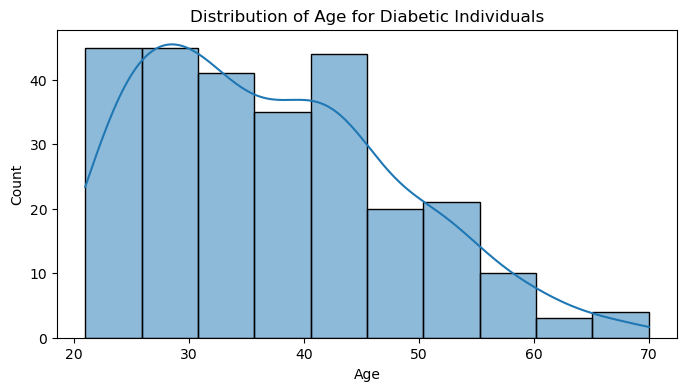

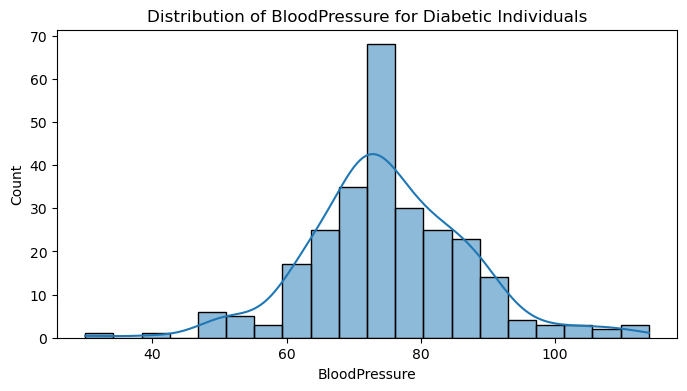

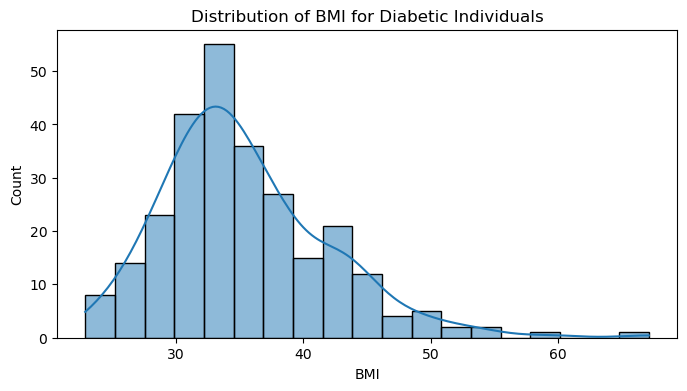

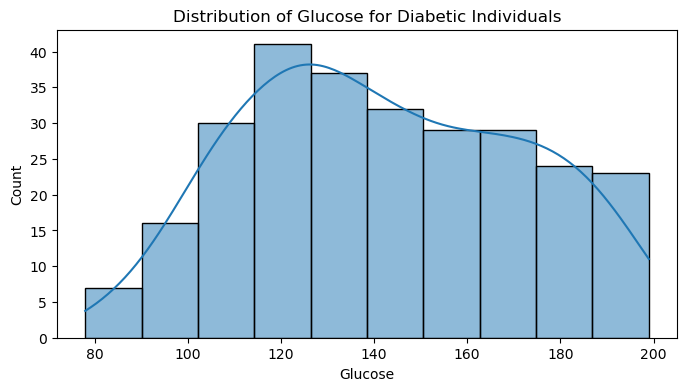

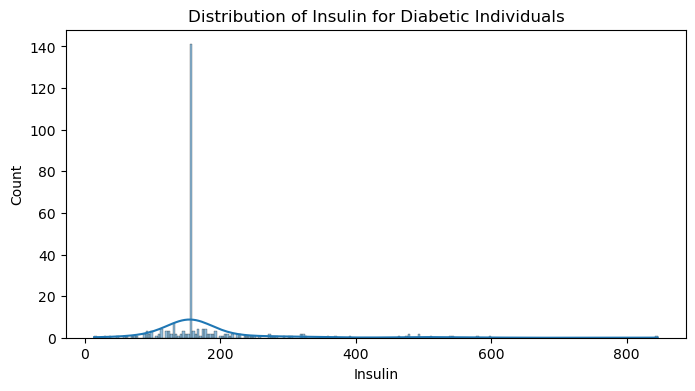

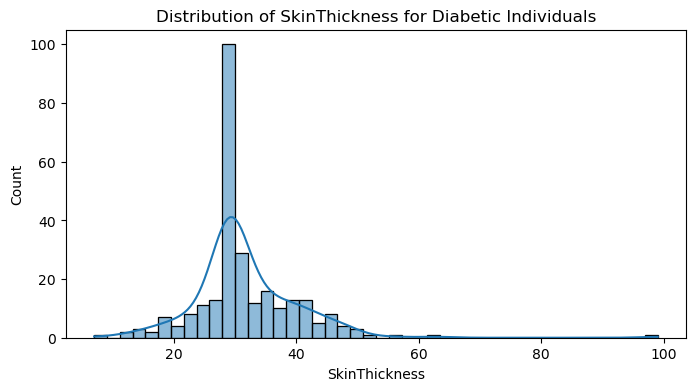

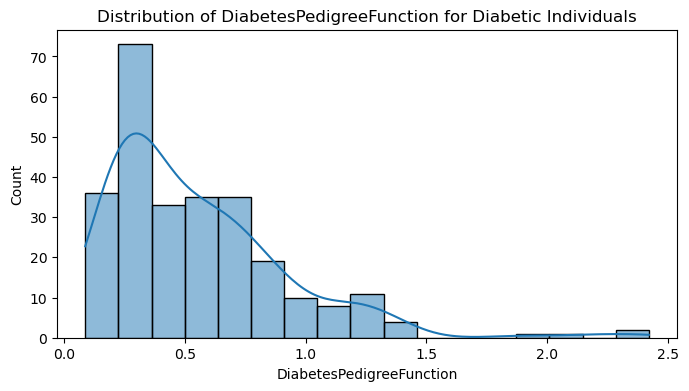

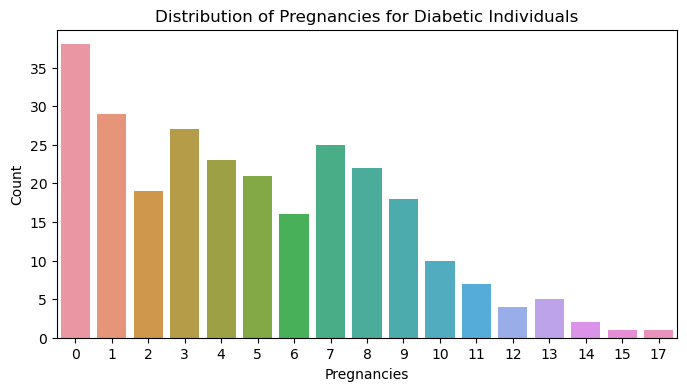

In [22]:
numerical_columns = ["Age", "BloodPressure", "BMI", "Glucose", "Insulin", "SkinThickness", "DiabetesPedigreeFunction"]
categorical_column = "Pregnancies"


diabetic_data = data[data['Outcome'] == 1]
                                       # Plotting numerical variables by Outcome
for column in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=diabetic_data, x=column, kde=True)
    plt.title(f'Distribution of {column} for Diabetic Individuals')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()
    
    # Ploting categorical variable by Outcome
    
plt.figure(figsize=(8, 4))
sns.countplot(data=diabetic_data, x=categorical_column)
plt.title(f'Distribution of {categorical_column} for Diabetic Individuals')
plt.xlabel(categorical_column)
plt.ylabel('Count')
plt.show()

#  Model Building

 separating the data and labels

In [23]:
X = data.drop(columns = 'Outcome', axis=1)
Y = data['Outcome']

In [24]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0              6    148.0           72.0       35.00000  155.548223  33.6   
1              1     85.0           66.0       29.00000  155.548223  26.6   
2              8    183.0           64.0       29.15342  155.548223  23.3   
3              1     89.0           66.0       23.00000   94.000000  28.1   
4              0    137.0           40.0       35.00000  168.000000  43.1   
..           ...      ...            ...            ...         ...   ...   
763           10    101.0           76.0       48.00000  180.000000  32.9   
764            2    122.0           70.0       27.00000  155.548223  36.8   
765            5    121.0           72.0       23.00000  112.000000  26.2   
766            1    126.0           60.0       29.15342  155.548223  30.1   
767            1     93.0           70.0       31.00000  155.548223  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1

In [25]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


# Standardization of the Data

In [26]:
scaler = StandardScaler()

In [27]:
scaler.fit(X)

StandardScaler()

In [28]:
standardized_data = scaler.transform(X)

In [30]:
X = standardized_data
Y = data['Outcome']

In [31]:
 print(X)

[[ 0.63994726  0.86510807 -0.03351824 ...  0.16629174  0.46849198
   1.4259954 ]
 [-0.84488505 -1.20616153 -0.52985903 ... -0.85253118 -0.36506078
  -0.19067191]
 [ 1.23388019  2.0158134  -0.69530596 ... -1.33283341  0.60439732
  -0.10558415]
 ...
 [ 0.3429808  -0.0225789  -0.03351824 ... -0.91074963 -0.68519336
  -0.27575966]
 [-0.84488505  0.14180757 -1.02619983 ... -0.34311972 -0.37110101
   1.17073215]
 [-0.84488505 -0.94314317 -0.19896517 ... -0.29945588 -0.47378505
  -0.87137393]]


Train Test Spilt

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=3)

In [33]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


Model Training

In [34]:
 classifier = svm.SVC(kernel='linear')  #training the SVM Classifier

In [35]:
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

 Model Evaluation

 Accuracy Score

In [38]:
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [39]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.7817589576547231


In [40]:
 # accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [41]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7532467532467533


# Building a Predictive System

In [42]:
 input_data = (5, 166, 72, 19, 175, 25.8, 0.587, 51)
                                                        # Converting input_data to a numpy array, reshape, and standardize
 input_data = np.array(input_data).reshape(1, -1)
 std_data = scaler.transform(input_data)
 # Predict and print the result
 prediction = classifier.predict(std_data)
 result = 'The person is diabetic' if prediction[0] == 1 else 'The person is not diabetic'
 print(result)

The person is diabetic


C:\Users\pavan\anaconda3\anaconda_last\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
